In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
from datetime import date
import pandas as pd

tesla=pd.read_csv('TSLA.csv', index_col='Date')
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
12/9/2020,653.690002,654.320007,588.000000,604.479980,604.479980,71291200
12/10/2020,574.369995,627.750000,566.340027,627.070007,627.070007,67083200
12/11/2020,615.010010,624.000000,596.799988,609.989990,609.989990,46475000
12/14/2020,619.000000,642.750000,610.200012,639.830017,639.830017,52040600
12/15/2020,643.280029,646.900024,623.799988,633.250000,633.250000,45071500


In [ ]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,758.154862,773.576639,741.350001,758.448576,758.448576,2.950397e+07
std,152.361303,156.876810,147.656922,152.452122,152.452122,1.794675e+07
min,552.549988,566.210022,539.489990,563.000000,563.000000,9.800600e+06
25%,659.609985,668.450012,642.200012,656.570007,656.570007,1.918614e+07
50%,710.679993,719.030029,698.400024,709.739990,709.739990,2.566590e+07
75%,814.289978,821.000000,796.570007,811.190002,811.190002,3.382360e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,2.221262e+08


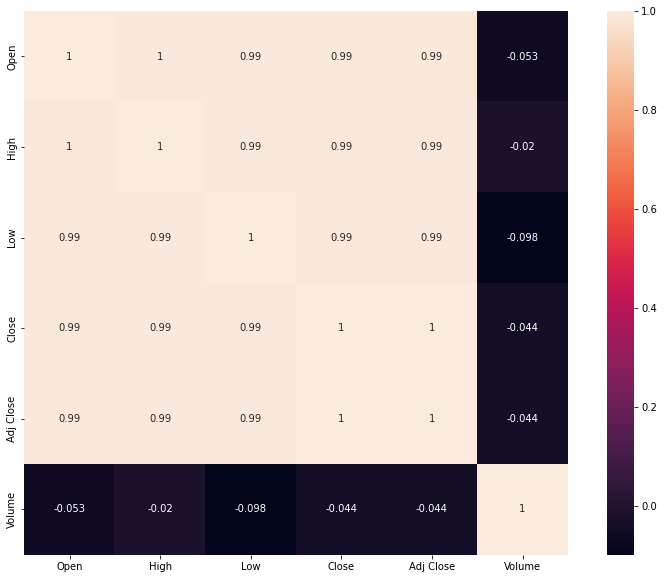

In [ ]:
#checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(14, 10))
sns.heatmap(tesla.corr(), annot=True, square=True);

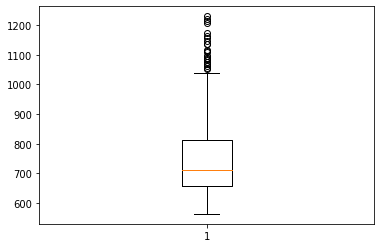

<Figure size 720x504 with 0 Axes>

Date
12/9/2020      604.479980
12/10/2020     627.070007
12/11/2020     609.989990
12/14/2020     639.830017
12/15/2020     633.250000
                 ...     
12/3/2021     1014.969971
12/6/2021     1009.010010
12/7/2021     1051.750000
12/8/2021     1068.959961
12/9/2021     1003.799988
Name: Close, Length: 253, dtype: float64

In [ ]:
#boxplot for tesla
arr1=tesla['Close']
plt.boxplot(arr1)
fig = plt.figure(figsize =(10, 7))
plt.show()
arr1

In [ ]:
#finding the interquartile ranges
# finding the 1st quartile
import numpy as np
q1 = np.quantile(arr1, 0.25)

# finding the 3rd quartile
q3 = np.quantile(arr1, 0.75)
med = np.median(arr1)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


154.6199949999999 1043.1199944999998 424.6400145000002


In [ ]:
outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:Date
10/28/2021    1077.040039
10/29/2021    1114.000000
11/1/2021     1208.589966
11/2/2021     1172.000000
11/3/2021     1213.859985
11/4/2021     1229.910034
11/5/2021     1222.089966
11/8/2021     1162.939941
11/10/2021    1067.949951
11/11/2021    1063.510010
11/16/2021    1054.729980
11/17/2021    1089.010010
11/18/2021    1096.380005
11/19/2021    1137.060059
11/22/2021    1156.869995
11/23/2021    1109.030029
11/24/2021    1116.000000
11/26/2021    1081.920044
11/29/2021    1136.989990
11/30/2021    1144.760010
12/1/2021     1095.000000
12/2/2021     1084.599976
12/7/2021     1051.750000
12/8/2021     1068.959961
Name: Close, dtype: float64


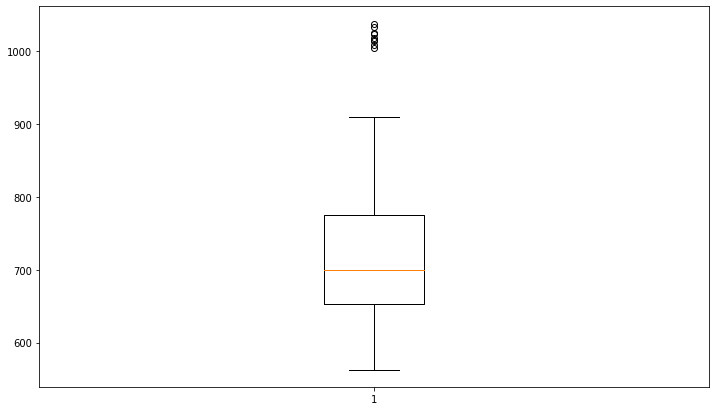

In [ ]:
#now we will eliminate the outliers and plot again
# boxplot of data within the whisker
arr2 = arr1[(arr1 >= lower_bound) & (arr1 <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(arr2)
plt.show()


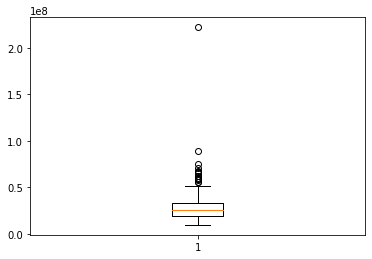

<Figure size 720x504 with 0 Axes>

Date
12/9/2020     71291200
12/10/2020    67083200
12/11/2020    46475000
12/14/2020    52040600
12/15/2020    45071500
                ...   
12/3/2021     30696300
12/6/2021     27221000
12/7/2021     18694900
12/8/2021     13968800
12/9/2021     19186139
Name: Volume, Length: 253, dtype: int64

In [ ]:
#Tesla volume boxplot
#boxplot for tesla
arr3=tesla['Volume']
plt.boxplot(arr3)
fig = plt.figure(figsize =(10, 7))
plt.show()
arr3

In [ ]:
# finding the 1st quartile
q1 = np.quantile(arr3, 0.25)

# finding the 3rd quartile
q3 = np.quantile(arr3, 0.75)
med = np.median(arr3)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


14637461.0 55779791.5 -2770052.5


In [ ]:
outliers = arr3[(arr3 <= lower_bound) | (arr3 >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))


The following are the outliers in the boxplot:Date
12/9/2020      71291200
12/10/2020     67083200
12/17/2020     56270100
12/18/2020    222126200
12/21/2020     58045300
1/8/2021       75055500
1/11/2021      59301600
2/23/2021      66606900
3/4/2021       65919500
3/5/2021       89396500
3/9/2021       67523300
3/10/2021      60605700
10/25/2021     62852100
10/26/2021     62415000
11/1/2021      56048700
11/9/2021      59105800
Name: Volume, dtype: int64


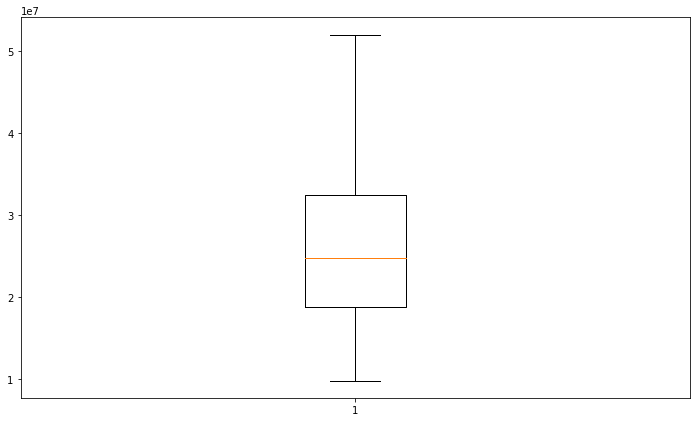

In [ ]:
# boxplot of data within the whisker
arr4 = arr3[(arr3 >= lower_bound) & (arr3 <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(arr4)
plt.show()


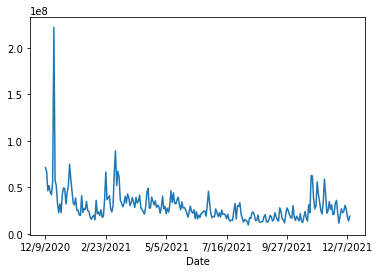

In [ ]:
#timeseries plot
tesla['Volume'].plot()
#print('scope: from {} to {}'.format(data.datetime.min(),data.datetime.max()))

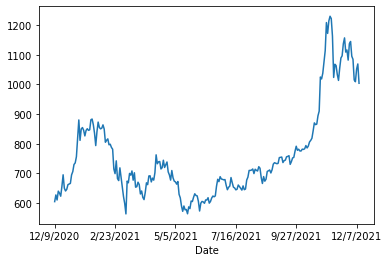

In [ ]:
tesla['Close'].plot()

In [ ]:
#SCALING both columns before plotting
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


scaler = MinMaxScaler()

tesla_scaled = scaler.fit_transform(tesla.to_numpy())
tesla_scaled = pd.DataFrame(tesla_scaled, columns=[
'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

print("Scaled Dataset Using MinMaxScaler")
tesla_scaled.head()


Scaled Dataset Using MinMaxScaler


,Open,High,Low,Close,Adj Close,Volume
0,0.148330,0.130094,0.071600,0.062197,0.062197,0.289605
1,0.032001,0.090863,0.039630,0.096070,0.096070,0.269787
2,0.091602,0.085327,0.084589,0.070459,0.070459,0.172727
3,0.097454,0.113011,0.104367,0.115203,0.115203,0.198940
4,0.133063,0.119138,0.124441,0.105337,0.105337,0.166117


In [ ]:
tesla_scaled.describe()

NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
data=df[['Ticker','Close','Date']].pivot_table(index='Date', columns='Ticker', values='Close').dropna()
X = data[['TSLA', 'GM','GLD','MRNA','GSPC']].copy()
scaleX = StandardScaler().fit(X)
data_std = pd.DataFrame(scaleX.transform(X), index=X.index, columns=X.columns)
data_std['TSLA'] = data.TSLA.copy()
ax = data_std.plot(secondary_y=['TSLA'], figsize=(15,10))
ax.set_ylabel('X scale')
ax.right_ax.set_ylabel('Tesla scale');

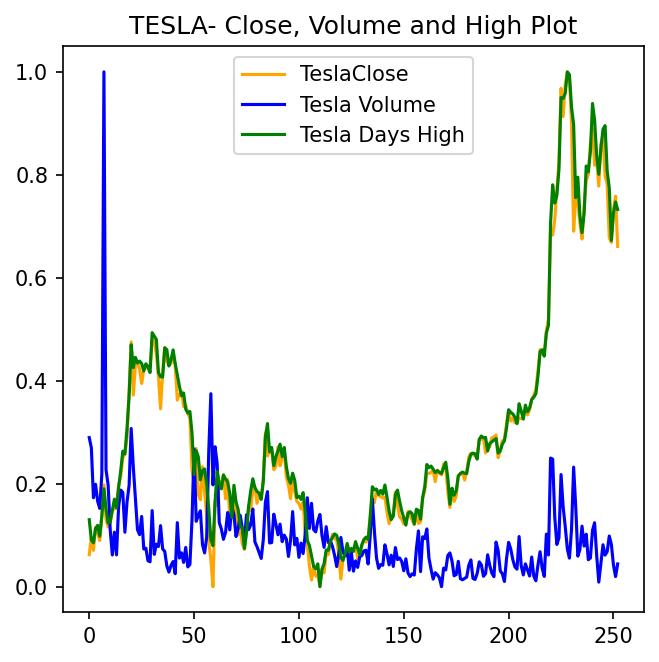

In [ ]:
#Plotting both line graphs together
import matplotlib.pyplot as plt

# code# Visualizing The Open Price of all the stocks  # to set the plot size
plt.figure(figsize=(5,5), dpi=150)  # using plot method to plot open prices.# in plot method we set the label and color of the 
tesla_scaled['Close'].plot(label='TeslaClose', color='orange')
tesla_scaled['Volume'].plot(label='Tesla Volume',color='blue')
tesla_scaled['High'].plot(label='Tesla Days High',color='green')

# adding title to the plot
plt.title('TESLA- Close, Volume and High Plot') 
# adding Label to the x-axisplt.xlabel('Years')  # adding legend to the 
plt.legend()


In [ ]:
#BITCoIN
bitcoin=pd.read_csv('BTC.csv', index_col='Date')
# setting first name as index column
#bitcoin=bitcoin.set_index("Date")
 
# display
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
12/09/2020,18320.88477,18626.29297,17935.54688,18553.91602,18553.91602,3.442037e+10
12/10/2020,18553.29883,18553.29883,17957.06445,18264.99219,18264.99219,2.554713e+10
12/11/2020,18263.92969,18268.45313,17619.53320,18058.90430,18058.90430,2.791964e+10
12/12/2020,18051.32031,18919.55078,18046.04102,18803.65625,18803.65625,2.175258e+10
12/13/2020,18806.76563,19381.53516,18734.33203,19142.38281,19142.38281,2.545047e+10


In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 12/09/2020 to 12/09/2021
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       366 non-null    float64
 1   High       366 non-null    float64
 2   Low        366 non-null    float64
 3   Close      366 non-null    float64
 4   Adj Close  366 non-null    float64
 5   Volume     366 non-null    float64
dtypes: float64(6)
memory usage: 20.0+ KB


In [ ]:
bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,45779.936588,47114.727006,44270.662766,45848.698104,45848.698104,4.792778e+10
std,11546.438695,11633.678728,11369.832185,11456.543679,11456.543679,2.446711e+10
min,18051.320310,18268.453130,17619.533200,18058.904300,18058.904300,1.878799e+10
25%,35867.992185,37602.144533,34435.127927,35918.284177,35918.284177,3.357872e+10
50%,47060.503905,48305.214845,45465.650390,47093.171875,47093.171875,4.221319e+10
75%,56168.667970,57766.944335,54282.181640,56187.017575,56187.017575,5.851956e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.510000e+11


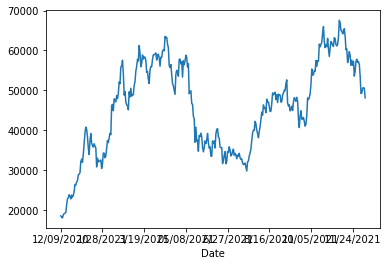

In [ ]:
bitcoin['Close'].plot()

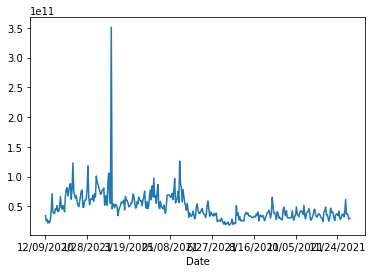

In [ ]:
bitcoin['Volume'].plot()

In [ ]:
tesla.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Scaled Dataset Using MinMaxScaler


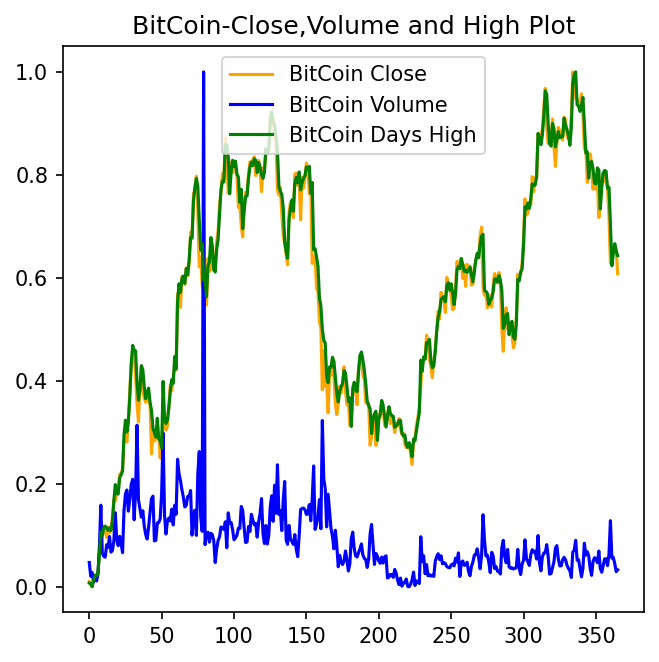

In [ ]:
#SCALING both columns before plotting
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt


scaler = MinMaxScaler()

bitcoin_scaled = scaler.fit_transform(bitcoin.to_numpy())
bitcoin_scaled = pd.DataFrame(bitcoin_scaled, columns=[
'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

print("Scaled Dataset Using MinMaxScaler")
bitcoin_scaled.head()

# code# Visualizing The Open Price of all the stocks  # to set the plot size
plt.figure(figsize=(5,5), dpi=150)  # using plot method to plot open prices.# in plot method we set the label and color of the 
bitcoin_scaled['Close'].plot(label='BitCoin Close', color='orange')
bitcoin_scaled['Volume'].plot(label='BitCoin Volume',color='blue') 
bitcoin_scaled['High'].plot(label='BitCoin Days High',color='green')  
# adding title to the plot
plt.title('BitCoin-Close,Volume and High Plot') 
# adding Label to the x-axisplt.xlabel('Years')  # adding legend to the 
plt.legend()

In [ ]:
#TOTAL SALES -Monthwise

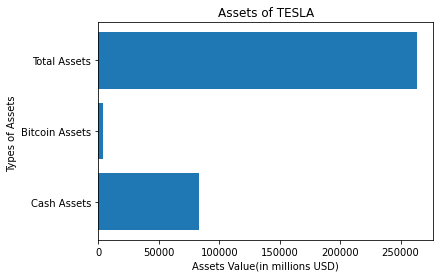

In [ ]:
#Total crypto assets in % = PIE CHART
#Total crypto assets 
# Creating dataset
import matplotlib.pyplot as plt
#Holding value from 24 march to 13 May -horizontal bar chart-TESLA
#using close value of dataset

import matplotlib.pyplot as plt
y=['Cash Assets','Bitcoin Assets','Total Assets']

# getting values against each value of y
x=[83350,3902,263791]
plt.barh(y, x)

# setting label of y-axis
plt.ylabel("Types of Assets ")

# setting label of x-axis
plt.xlabel("Assets Value(in millions USD)")
plt.title("Assets of TESLA")
plt.show()

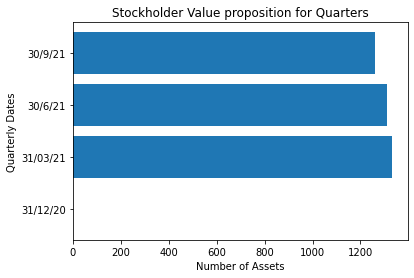

In [ ]:
#Holding value from 24 march to 13 May -horizontal bar chart-TESLA
#using close value of dataset

import matplotlib.pyplot as plt
y=['31/12/20', '31/03/21', '30/6/21', '30/9/21']

# getting values against each value of y
x=[0,1331,1311,1260]
plt.barh(y, x)

# setting label of y-axis
plt.ylabel("Quarterly Dates")

# setting label of x-axis
plt.xlabel("Number of Assets")
plt.title("Stockholder Value proposition for Quarters")
plt.show()



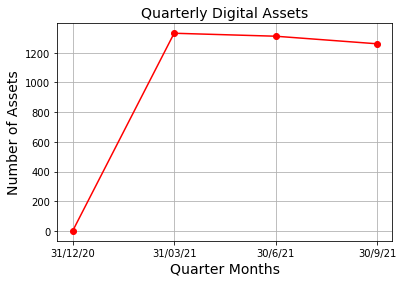

In [ ]:
import matplotlib.pyplot as plt
   
Year = ['31/12/20', '31/03/21', '30/6/21', '30/9/21']
Unemployment_Rate = [0,1331,1311,1260]
  
plt.plot(Year, Unemployment_Rate, color='red', marker='o')
plt.title('Quarterly Digital Assets', fontsize=14)
plt.xlabel('Quarter Months', fontsize=14)
plt.ylabel('Number of Assets', fontsize=14)
plt.grid(True)
#annotation

plt.show()